In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import metpy.calc as mpcalc
from metpy.plots import SkewT
from metpy.units import units

In [46]:
figdir = "../figures/"
figname = "verticalProfile"
datafile = "../Data/sounding20180626.dat"

In [32]:
altitudesPueblos = {"Teror": 562, "Valleseco": 1000, "Firgas": 511, 
                    "Arucas": 400, "Cruz de\nTejeda": 1580}

In [33]:
alt, pueblos = [], []
for k, val in altitudesPueblos.items():
    alt.append(val)
    pueblos.append(k)
pueblos

['Teror', 'Valleseco', 'Firgas', 'Arucas', 'Cruz de\nTejeda']

## Load data

In [5]:
col_names = ['pressure', 'height', 'temperature', 'dewpoint', 'direction', 'speed']

df = pd.read_fwf(datafile, skiprows=5, usecols=[0, 1, 2, 3, 6, 7], 
                 names=col_names)

### Select altitude

In [6]:
goodheight = df["height"] < 2500
dewpoint = df["dewpoint"][goodheight]

## Make the plot

In [20]:
# Compute relative humidity
relhum = np.zeros_like(df["temperature"][goodheight])

for i in range(0, len(relhum)):
    relhum[i] = mpcalc.relative_humidity_from_dewpoint(df["temperature"][goodheight][i] * units.celsius, 
                                                df["dewpoint"][goodheight][i] * units.celsius)

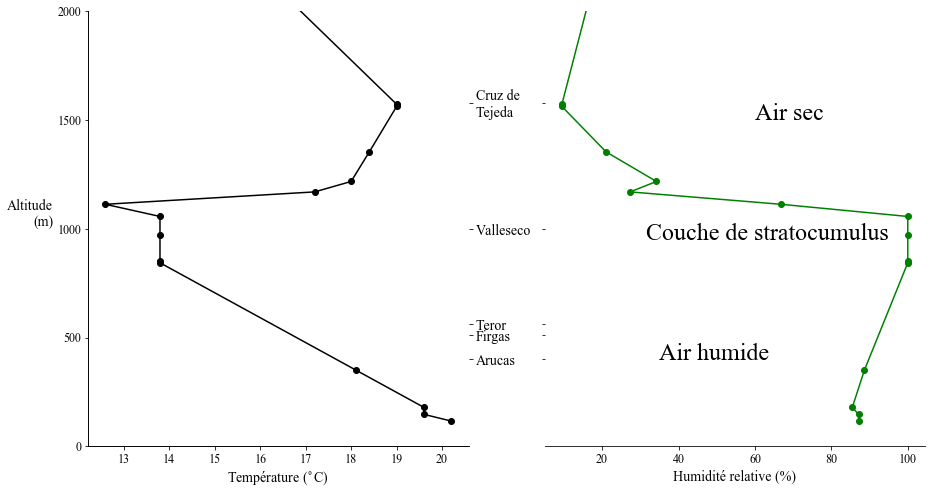

In [47]:
plt.figure(figsize=(15, 8))
ax = plt.subplot(121)
ax.set_ylim(0, 2000)
plt.plot(df["temperature"][goodheight], df["height"][goodheight], "ko-")
plt.xlabel("Température ($^{\circ}$C)", fontsize=14)
plt.ylabel("Altitude\n(m)", rotation=0, ha='right', fontsize=14)
#plt.ylim(0., 2000.)
# plt.xlim(-10., 10.)
ax2 = ax.twinx()
ax2.set_ylim(0, 2000)
ax2.set_yticks(alt)
ax2.set_yticklabels(pueblos, fontsize=14)
ax.set_yticks([0, 500, 1000, 1500, 2000])
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)

# Subplot with relative humidity
ax3 = plt.subplot(122)
ax3.plot(relhum * 100, df["height"][goodheight], "go-")
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.spines['left'].set_visible(False)

ax3.set_yticklabels("")
ax3.set_yticks(alt)
ax3.tick_params(axis='x', labelsize=12)
ax3.tick_params(axis='y', labelsize=12)
ax3.set_ylim(0, 2000.)
ax3.text(60, 1500, "Air sec", fontsize=24)
ax3.text(35, 400, "Air humide", fontsize=24)
ax3.text(95, 950, "Couche de stratocumulus", fontsize=24, ha="right")

plt.xlabel("Humidité relative (%)", fontsize=14)
#ax3.yaxis.tick_right()
plt.savefig(os.path.join(figdir, figname), transparent=False, dpi=300,
            edgecolor='white', bbox_inches='tight', pad_inches=0)
plt.show()
plt.close()